# Addendum: Expanding R-Group Substructures from P2M

The Proteome2Metabolome (P2M) tool is useful in translating proteome identifiers into computer-friendly lists of associated metabolite compounds for the purpose of upstream compound identification. However, a small subset of queried metabolite structures are represented as R-group substructures of larger protein scaffolds or biomolecules.

While the majority of P2M compounds represent complete structures tied to chemical transformations that proteins in a given proteome are known to be involved in, and can thus be used as-is, the portion of R-group containing substructures may be of interest to some users. Recognizing this, we have included some additional utilities for users to explore the space of compounds potentially represented by the partial R-group containing substructures. **We caution that this workflow is more of a "spray and pray" method which will generate numerous compounds, not all of which will be relevant to the biological system in question, and should thus be used minimally and ideally with external verification.**

In [2]:
# import libraries
import p2m
import pandas as pd

First, we will load the list of partial (R-group containing) structures from the example run of P2M. The `smiles_partial.tsv` file can be found by unzipping the `example_run.zip` included in the resources and navigating to `p2m/partial`.

In [3]:
%%time

# load R-group structures (containing '*' wildcards)
data = pd.read_csv("smiles_partial.tsv", sep="\t")
print(len(data))
data.head()

360
CPU times: user 4.32 ms, sys: 2.18 ms, total: 6.5 ms
Wall time: 12.5 ms


,uniprot,identifier,chebiId,name,smiles,rheaIds
0,http://purl.uniprot.org/uniprot/P0AGG4,P0AGG4,CHEBI:29950,[protein]-dithiol,C(=O)(*)[C@@H](N*)CS,"18749,18749,18753,18753"
1,http://purl.uniprot.org/uniprot/P0AGG4,P0AGG4,CHEBI:50058,[protein]-disulfide,C([C@@H](N*)CSSC[C@@H](C(=O)*)N*)(=O)*,"18749,18753"
2,http://purl.uniprot.org/uniprot/P68398,P68398,CHEBI:74411,adenosine(34) in tRNA,NC1=NC=NC2=C1N=CN2[C@@H]3O[C@H](COP(=O)(*)[O-]...,43168
3,http://purl.uniprot.org/uniprot/P68398,P68398,CHEBI:82852,inosine(34) in tRNA,O[C@@H]1[C@H](O-*)[C@@H](COP([O-])(-*)=O)O[C@H...,43168
4,http://purl.uniprot.org/uniprot/P0A9K9,P0A9K9,CHEBI:83834,[protein]-peptidylproline (omega=180),*-C(=O)[C@@H]1CCCN1C(-*)=O,16237


In [4]:
%%time

# take first partial smiles
i = 0
smiles = data["smiles"].values[i]

result = p2m.query.substruct2struct(smiles)
print(len(result))
result.head()

2618
CPU times: user 99.6 ms, sys: 28.5 ms, total: 128 ms
Wall time: 3.66 s


,chebiId,name,smiles
0,CHEBI:159602,Asn-Asp-Cys,SC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CC(=O)N)CC...
1,CHEBI:39390,felinine,CC(C)(CCO)SC[C@H](N)C(O)=O
2,CHEBI:53600,benzylpenicillanyl group,[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC3...
3,CHEBI:135919,nesiritide,[H]N[C@@H](CO)C(N1CCC[C@H]1C(N[C@@H](CCCCN)C(N...
4,CHEBI:159670,Asn-Cys-Tyr,SC[C@H](NC(=O)[C@@H](N)CC(=O)N)C(=O)N[C@@H](CC...


The results above contain all SMILES found to be related to the partial SMILES via ChEBI ontology. However, the broad ChEBI search methodology may return some compounds which are not of interest to the user to due biological relevance or other reasons not contained within ChEBI.

Thus, we have also included the additional option to query all searched smiles against SwissLipids. Entries will be annotated with the SwissLipids ID (`slid`) and name as stored in the SwissLipids database. Users can cross-reference entries with valid SwissLipids entries to obtain more detailed information about the compounds returned from the broad ChEBI search.

_Note that this option may take a long time and the below code may take > 1 hour to run._

In [5]:
%%time
# check for matching swisslipids entries
result_swiss = p2m.query.substruct2struct(smiles, swisslipids=True)
print(len(result_swiss))
result_swiss

2618
CPU times: user 31.5 s, sys: 5.29 s, total: 36.8 s
Wall time: 1h 12min 4s


,chebiId,name,smiles,slId,slmName
0,CHEBI:159602,Asn-Asp-Cys,SC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CC(=O)N)CC...,NaN,NaN
1,CHEBI:39390,felinine,CC(C)(CCO)SC[C@H](N)C(O)=O,NaN,NaN
2,CHEBI:53600,benzylpenicillanyl group,[H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)CC3...,NaN,NaN
3,CHEBI:135919,nesiritide,[H]N[C@@H](CO)C(N1CCC[C@H]1C(N[C@@H](CCCCN)C(N...,NaN,NaN
4,CHEBI:159670,Asn-Cys-Tyr,SC[C@H](NC(=O)[C@@H](N)CC(=O)N)C(=O)N[C@@H](CC...,NaN,NaN
...,...,...,...,...,...
2613,CHEBI:159158,Leu-Glu-Cys,SC[C@H](NC(=O)[C@@H](NC(=O)[C@@H](N)CC(C)C)CCC...,NaN,NaN
2614,CHEBI:52151,benzylpenicillin benethamine,[H][N+]([H])(CCc1ccccc1)Cc1ccccc1.[H][C@]12SC(...,NaN,NaN
2615,CHEBI:161547,Cys-Met-Asp,S(CC[C@H](NC(=O)[C@@H](N)CS)C(=O)N[C@@H](CC(O)...,NaN,NaN
2616,CHEBI:139126,C-terminal S-carbamoyl-L-cysteinate residue,C([C@H](CSC(N)=O)N*)(=O)[O-],NaN,NaN


In [6]:
# filter by compounds with valid SwissLipids entries
result_swiss[result_swiss["slId"].notna()]

,chebiId,name,smiles,slId,slmName
320,CHEBI:133768,(R)-PGA2-S-glutathione conjugate(2-),[C@H]1([C@H]([C@@H](CC1=O)SC[C@H](NC(CC[C@H]([...,SLM_000597652,prostaglandin A2-S-(R)-glutathione
418,CHEBI:133772,(S)-PGJ2-S-glutathione conjugate(2-),[NH3+][C@@H](CCC(=O)N[C@@H](CS[C@@H]1[C@@H]([C...,SLM_000597656,prostaglandin J2-S-(S)-glutathione
448,CHEBI:137407,"(13R)-S-glutathionyl-(14S)-hydroxy-(4Z,7Z,9E,1...",[NH3+][C@@H](CCC(=O)N[C@H](C(=O)NCC(=O)[O-])CS...,SLM_000597873,"(13R)-S-glutathionyl-(14S)-hydroxy-(4Z,7Z,9E,1..."
529,CHEBI:133618,leukotriene F4(2-),C([C@H](NC(CC[C@H]([NH3+])C(=O)[O-])=O)C([O-])...,SLM_000597644,leukotriene F4
552,CHEBI:57462,leukotriene E4(1-),CCCCC\C=C/C\C=C/C=C/C=C/[C@@H](SC[C@H]([NH3+])...,SLM_000501337,Leukotriene E4
695,CHEBI:63166,leukotriene D4(1-),CCCCC\C=C/C\C=C/C=C/C=C/[C@@H](SC[C@H]([NH3+])...,SLM_000500466,Leukotriene D4
1555,CHEBI:57973,leukotriene C4(2-),CCCCC\C=C/C\C=C/C=C/C=C/[C@@H](SC[C@H](NC(=O)C...,SLM_000000887,Leukotriene C4
1986,CHEBI:132200,"11(S),15(S)-dihydroxy-14(R)-(S-glutathionyl)-5...",C(CCCC)[C@@H]([C@@H](\C=C\[C@H](C/C=C\C/C=C\CC...,SLM_000501501,"(14S,15S)-hepoxilin A3-C (14R)"
2194,CHEBI:133769,(S)-PGA2-S-glutathione conjugate(2-),[C@H]1([C@H]([C@H](CC1=O)SC[C@H](NC(CC[C@H]([N...,SLM_000597653,prostaglandin A2-S-(S)-glutathione
2243,CHEBI:133771,(R)-PGJ2-S-glutathione conjugate(2-),[NH3+][C@@H](CCC(=O)N[C@@H](CS[C@H]1[C@@H]([C@...,SLM_000597655,prostaglandin J2-S-(R)-glutathione


For instance, the SwissLipids page for Leukotriene D4 (`SLM_000500466`) shows the following protein interactions:

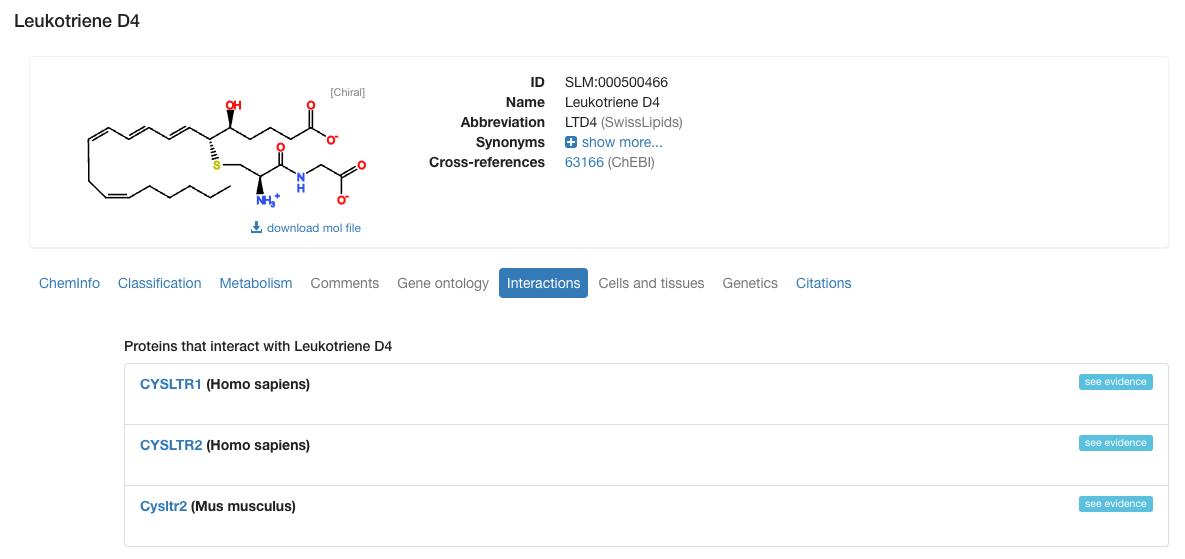

For a _Homo sapiens_ or _Mus musculus_ proteome search, the result could indicate this compound as potentially of interest. However, in _E. coli_ systems, these results may be suggestive of further consideration by the user.